# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

## Leemos nuestro archivo de entrada `reviews_sentiment`

In [88]:
df = pd.read_csv("./data/reviews_sentiment.csv",sep=";")
df.head()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

In [90]:
df_nuevo = df[["wordcount","sentimentValue","Star Rating"]]
df_nuevo

,wordcount,sentimentValue,Star Rating
0,23,-0.486389,1
1,20,-0.586187,1
2,4,-0.602240,1
3,17,-0.616271,1
4,6,-0.651784,1
...,...,...,...
252,3,2.814818,5
253,1,2.924393,5
254,1,2.924393,5
255,1,2.924393,5


In [91]:
df_nuevo.describe()

,wordcount,sentimentValue,Star Rating
count,257.000000,257.000000,257.000000
mean,11.501946,0.383849,3.420233
std,13.159812,0.897987,1.409531
min,1.000000,-2.276469,1.000000
25%,3.000000,-0.108144,3.000000
50%,7.000000,0.264091,3.000000
75%,16.000000,0.808384,5.000000
max,103.000000,3.264579,5.000000


In [92]:
df_nuevo = df_nuevo[(df_nuevo["sentimentValue"] >= -4) & (df_nuevo["sentimentValue"] <= 4)]
df_nuevo

,wordcount,sentimentValue,Star Rating
0,23,-0.486389,1
1,20,-0.586187,1
2,4,-0.602240,1
3,17,-0.616271,1
4,6,-0.651784,1
...,...,...,...
252,3,2.814818,5
253,1,2.924393,5
254,1,2.924393,5
255,1,2.924393,5


## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating. Realiza otras visualizaciones para ver la relación de tus datos.

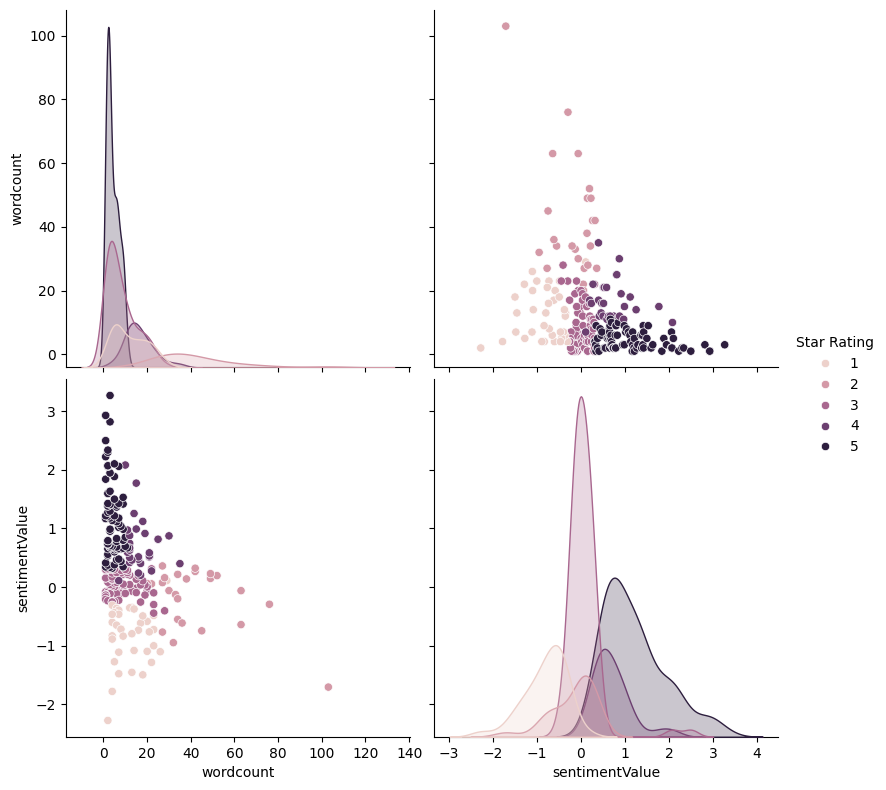

In [93]:
sns.pairplot(df_nuevo,
            hue='Star Rating',
            height=4,
            vars=["wordcount","sentimentValue"],
            kind='scatter'); # "reg" de regresión lineal

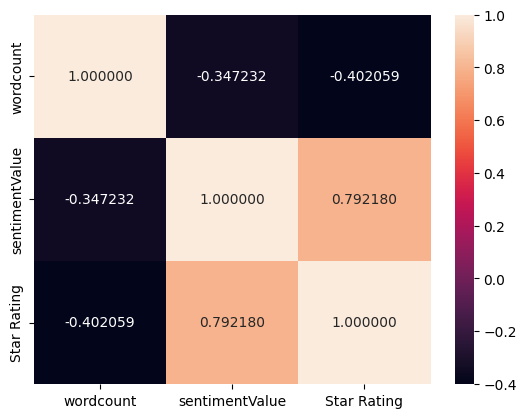

In [94]:
sns.heatmap(df_nuevo.corr(), annot=True,fmt='f');

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df_nuevo[['wordcount', 'sentimentValue']]
y = df['Star Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler() #Realizamos el escalado en el rango de 0 a 1.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train min: {X_train_scaled.min().min():.2f}")
print(f"Train max: {X_train_scaled.max().max():.2f}")
print()
print(f"Test min: {X_test_scaled.min().min():.2f}")
print(f"Test max: {X_test_scaled.max().max():.2f}")

Train min: 0.00
Train max: 1.00

Test min: -0.10
Test max: 0.93


## Creamos el Modelo
Entrena con un KNN y evalúa el error en train y en test

In [96]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_test_prediction = knn.predict(X_test_scaled)

print(y_test_prediction)

[3 5 1 2 1 1 5 1 3 3 3 3 2 5 3 5 3 1 5 5 1 3 5 5 5 1 3 5 5 5 5 5 1 4 3 1 5
 2 3 1 5 2 5 3 3 2 4 5 1 4 5 5]


## Evalúa tu modelo

In [97]:
#Nos va a interesar predecir en "Precision" 
from sklearn.metrics import precision_score,classification_report,accuracy_score

y_train_prediction = knn.predict(X_train_scaled)

train_precision = precision_score(y_train,y_train_prediction,average="weighted")
test_precision = precision_score(y_test,y_test_prediction,average="weighted")

print(f"Precision (train): {train_precision:.2f}")
print(f"Precision (test): {test_precision:.2f}")

Precision (train): 0.92
Precision (test): 0.86


In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_prediction))
print(classification_report(y_test,y_test_prediction))

              precision    recall  f1-score   support

           1       0.93      0.96      0.95        27
           2       0.95      0.86      0.90        22
           3       0.88      0.94      0.91        64
           4       0.94      0.70      0.80        23
           5       0.93      0.97      0.95        69

    accuracy                           0.92       205
   macro avg       0.93      0.89      0.90       205
weighted avg       0.92      0.92      0.92       205

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.40      1.00      0.57         2
           3       0.85      0.79      0.81        14
           4       1.00      0.43      0.60         7
           5       0.90      0.95      0.92        19

    accuracy                           0.83        52
   macro avg       0.79      0.81      0.75        52
weighted avg       0.86      0.83      0.82        52



## ¿Cómo obtener el mejor valor de k? Crea y evalúa nuevos modelos
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

In [99]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': list(range(1,10))}
#Realizamos ahora el GridSearchCV:
knn_grid = GridSearchCV(estimator=knn,param_grid=param_grid,cv=5)
knn_grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [100]:
knn_grid.best_params_

{'n_neighbors': 5}

In [101]:
#Accuracy
from sklearn.metrics import accuracy_score
train_precision = accuracy_score(y_train,y_train_prediction)
test_precision = accuracy_score(y_test,y_test_prediction)

print(f"Accuracy (train): {train_precision:.2f}")
print(f"Accuracy (test): {test_precision:.2f}")


Accuracy (train): 0.92
Accuracy (test): 0.83


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_prediction))
print(classification_report(y_test,y_test_prediction))

              precision    recall  f1-score   support

           1       0.93      0.96      0.95        27
           2       0.95      0.86      0.90        22
           3       0.88      0.94      0.91        64
           4       0.94      0.70      0.80        23
           5       0.93      0.97      0.95        69

    accuracy                           0.92       205
   macro avg       0.93      0.89      0.90       205
weighted avg       0.92      0.92      0.92       205

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.40      1.00      0.57         2
           3       0.85      0.79      0.81        14
           4       1.00      0.43      0.60         7
           5       0.90      0.95      0.92        19

    accuracy                           0.83        52
   macro avg       0.79      0.81      0.75        52
weighted avg       0.86      0.83      0.82        52



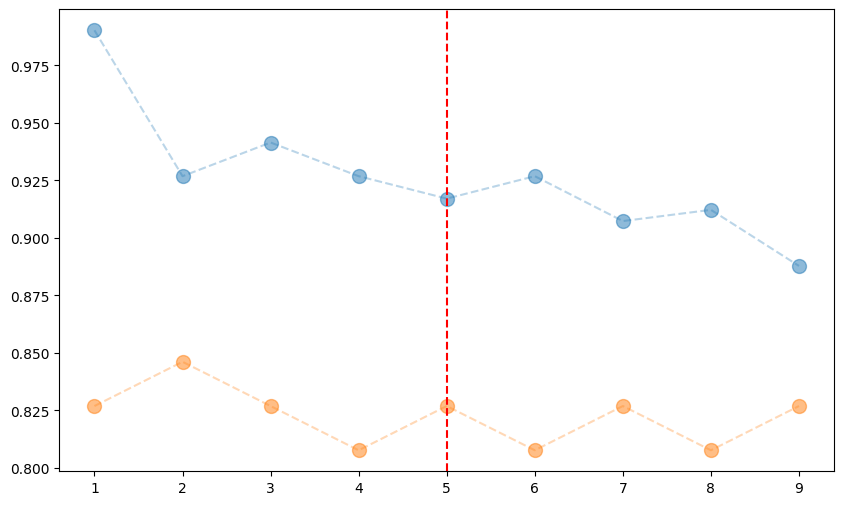

In [104]:
k_values = range(1, 10)
train_scores = []
test_scores = []

for k in k_values:
    # Crear y entrenar modelo
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)


    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)

    # Guardar scores
    train_scores.append(train_score)
    test_scores.append(test_score)


plt.figure(figsize=(10, 6))
plt.scatter(k_values, train_scores, alpha=0.5, label='Train', s=100)
plt.scatter(k_values, test_scores, alpha=0.5, label='Test', s=100)
plt.axvline(x=5,color='r',linestyle='--',label='k=5')

plt.plot(k_values, train_scores, '--', alpha=0.3)
plt.plot(k_values, test_scores, '--', alpha=0.3)

nos fijamos en el K=5 que corresponde con los valores anteriores

## Predice con nuevos datos.
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [109]:
punto_nuevo = {'wordcount': [5],
               'sentimentValue': [1]}

punto_nuevo = pd.DataFrame(punto_nuevo)

X = punto_nuevo[["wordcount","sentimentValue"]]

prediction = knn.predict(X)
print(prediction)

[2]


C:\Users\jonam\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
